[[5 3 0 4]
 [5 2 0 1]
 [3 4 0 5]
 [0 1 3 4]
 [5 0 2 4]]
[[4.99144856 2.99874028 2.02963207 3.98434718]
 [4.97442825 1.96989878 1.20083581 1.03234727]
 [3.0065885  3.9700329  2.01034465 4.98576034]
 [5.87381018 1.0215773  2.91605779 4.00399625]
 [4.96883243 2.4237447  2.095437   3.95048253]]


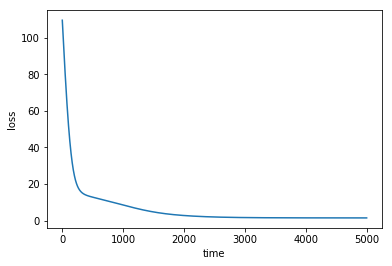

In [17]:
from math import *
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R,P,Q,K,steps=5000,alpha=0.0002,beta=0.02): #Matrix factorization functions，steps：Number of gradient descent；alpha：step size；beta：β。
    Q=Q.T                 # The .T operation represents the transpose of the matrix
    result=[]
    for step in range(steps): #gradient descent
        for i in range(len(R)):
            for j in range(len(R[i])):
                    eij=R[i][j]-numpy.dot(P[i,:],Q[:,j])       # .DOT is for matrix multiplication
                    for k in range(K):
                      if R[i][j]>0:        #The limit score is greater than zero
                        P[i][k]=P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])   #Add regularization, take the derivative of the loss function, and update the variable P
                        Q[k][j]=Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])   #Add regularization, take the derivative of the loss function, and update the variable Q
        eR=numpy.dot(P,Q)  
        e=0
        for i in range(len(R)):
            for j in range(len(R[i])):
              if R[i][j]>0:
                    e=e+pow(R[i][j]-numpy.dot(P[i,:],Q[:,j]),2)      #Sum of loss functions
                    for k in range(K):
                        e=e+(beta/2)*(pow(P[i][k],2)+pow(Q[k][j],2)) #Add the regularized sum of the loss functions
        result.append(e)
        if e<0.001:           #To determine whether it converges, 0.001 is the threshold value
            break
    return P,Q.T,result

if __name__ == '__main__':   #main function
    R=[                 #The original matrix
        [5,3,0,4],
        [5,2,0,1],
        [3,4,0,5],
        [0,1,3,4],
        [5,0,2,4]
    ]
    R=numpy.array(R)
    N=len(R)    #The number of rows in the original matrix R
    M=len(R[0]) #The number of columns in the original matrix R
    K=5    #The K value can be changed according to requirements
    P=numpy.random.rand(N,K) #Randomly generate a matrix with N rows and K columns
    Q=numpy.random.rand(M,K) #Randomly generate a matrix with M rows and K columns
    nP,nQ,result=matrix_factorization(R,P,Q,K)
    print(R)         #Output original matrix
    R_MF=numpy.dot(nP,nQ.T)
    print(R_MF)      #Output new matrix
    #drawing
    plt.plot(range(len(result)),result)
    plt.xlabel("time")
    plt.ylabel("loss")
    plt.show()